<a href="https://colab.research.google.com/github/thuviettran/demo-github/blob/main/finished_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone mã nguồn từ GitHub
!git clone https://github.com/SHIDCenter/PathoNet.git
%cd PathoNet

# Cài đặt các thư viện cần thiết
!pip install opencv-python scikit-image matplotlib

Cloning into 'PathoNet'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 272 (delta 18), reused 13 (delta 13), pack-reused 246 (from 1)
Receiving objects: 100% (272/272), 3.18 MiB | 28.33 MiB/s, done.
Resolving deltas: 100% (149/149), done.
/content/PathoNet


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Clone mã nguồn từ GitHub
!git clone https://github.com/SHIDCenter/PathoNet.git
%cd PathoNet

# Cài đặt các thư viện bổ trợ
!pip install opencv-python scikit-image

Cloning into 'PathoNet'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 272 (delta 18), reused 13 (delta 13), pack-reused 246 (from 1)
Receiving objects: 100% (272/272), 3.18 MiB | 38.79 MiB/s, done.
Resolving deltas: 100% (149/149), done.
/content/PathoNet/PathoNet


In [4]:
import os

# Đường dẫn gốc trên Drive của bạn
drive_path = '/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images'

# Tạo liên kết đến thư mục train và test
train_src = os.path.join(drive_path, 'train256')
test_src = os.path.join(drive_path, 'test256')

print(f"Kiểm tra thư mục Train: {os.path.exists(train_src)}")
print(f"Kiểm tra thư mục Test: {os.path.exists(test_src)}")

Kiểm tra thư mục Train: True
Kiểm tra thư mục Test: True


In [5]:
# 1. Hạ cấp các thư viện về phiên bản PathoNet cần
!pip install tensorflow==2.12.0
!pip install keras==2.12.0
!pip install scipy==1.2.1
!pip install opencv-python

# 2. Sửa lỗi import trong mã nguồn (PathoNet/models.py)
import os
file_path = "/content/PathoNet/PathoNet/models.py"
if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        content = f.read()
    # Thay thế đường dẫn import cũ bằng đường dẫn mới của TF 2.x
    content = content.replace("from keras.utils.layer_utils import get_source_inputs",
                              "from tensorflow.keras.utils import get_source_inputs")
    with open(file_path, 'w') as f:
        f.write(content)
    print("Đã sửa lỗi import trong models.py thành công!")

ERROR: Could not find a version that satisfies the requirement tensorflow==2.12.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.12.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-hub 0.21.1 requires keras>=3.5, but you have keras 2.12.0 which is incompatible.
tensorflow 2.19.0 requires keras>=3.5.0, but you have keras 2.12.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 86.6 MB/s eta 0:00:00
  error: subprocess-

In [6]:
!pip install tensorflow keras scipy opencv-python pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [7]:
import os

# 1. Sửa lỗi import Keras trong models.py
file_models = "/content/PathoNet/PathoNet/models.py"
if os.path.exists(file_models):
    with open(file_models, 'r') as f:
        content = f.read()
    content = content.replace("from keras.utils.layer_utils import get_source_inputs",
                              "from tensorflow.keras.utils import get_source_inputs")
    with open(file_models, 'w') as f:
        f.write(content)
    print("✓ Đã sửa models.py")

# 2. Sửa lỗi scipy.misc trong train.py
file_train = "/content/PathoNet/PathoNet/train.py"
if os.path.exists(file_train):
    with open(file_train, 'r') as f:
        lines = f.readlines()

    with open(file_train, 'w') as f:
        for line in lines:
            if "from scipy import misc" in line:
                f.write("from PIL import Image\nimport numpy as np\n")
            elif "misc.imread" in line:
                # Thay thế misc.imread bằng Pillow
                line = line.replace("misc.imread", "np.array(Image.open")
                f.write(line)
            else:
                f.write(line)
    print("✓ Đã sửa train.py (thay scipy bằng Pillow)")

✓ Đã sửa models.py
✓ Đã sửa train.py (thay scipy bằng Pillow)


In [8]:
import tensorflow as tf
print("Số lượng GPU khả dụng:", len(tf.config.list_physical_devices('GPU')))

Số lượng GPU khả dụng: 1


In [9]:
import os

files_to_fix = [
    "/content/PathoNet/PathoNet/models.py",
    "/content/PathoNet/PathoNet/train.py"
]

for file_path in files_to_fix:
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            content = f.read()

        # Sửa các lỗi import Keras phổ biến
        content = content.replace("from keras.utils.layer_utils import get_source_inputs", "from tensorflow.keras.utils import get_source_inputs")
        content = content.replace("from keras.utils.data_utils import get_file", "from tensorflow.keras.utils import get_file")
        content = content.replace("import keras.backend as K", "from tensorflow.keras import backend as K")

        # Sửa lỗi scipy.misc đã bị xóa
        if "from scipy import misc" in content:
            content = content.replace("from scipy import misc", "from PIL import Image\nimport numpy as np")
            content = content.replace("misc.imread", "np.array(Image.open")

        with open(file_path, 'w') as f:
            f.write(content)
        print(f"✓ Đã sửa file: {file_path}")

✓ Đã sửa file: /content/PathoNet/PathoNet/models.py
✓ Đã sửa file: /content/PathoNet/PathoNet/train.py


In [10]:
import json

# Định nghĩa cấu hình trỏ vào thư mục ảnh đã crop 256x256 trên Drive
config = {
    "train_path": "/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/train256",
    "test_path": "/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/test256",
    "save_path": "/content/drive/MyDrive/PathoNet_Results", # Nơi lưu mô hình sau khi train
    "batch_size": 16,
    "epochs": 100,
    "lr": 1e-4,
    "model_name": "PathoNet"
}

# Lưu file config
with open('/content/PathoNet/PathoNet/my_train_config.json', 'w') as f:
    json.dump(config, f, indent=4)

# Tạo thư mục lưu kết quả trên Drive để không bị mất khi đóng Colab
!mkdir -p "/content/drive/MyDrive/PathoNet_Results"

print("✓ Đã tạo file cấu hình thành công!")

✓ Đã tạo file cấu hình thành công!


In [11]:
import os

file_path = "/content/PathoNet/PathoNet/train.py"

if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    # Thay đổi đuôi .hdf5 thành .weights.h5 để phù hợp với Keras mới
    old_ext = ".hdf5"
    new_ext = ".weights.h5"

    if old_ext in content:
        content = content.replace(old_ext, new_ext)
        with open(file_path, 'w') as f:
            f.write(content)
        print(f"✓ Đã cập nhật định dạng checkpoint trong {file_path}")
    else:
        print("! Không tìm thấy định dạng .hdf5 hoặc file đã được sửa.")

✓ Đã cập nhật định dạng checkpoint trong /content/PathoNet/PathoNet/train.py


In [12]:
import os

file_path = "/content/PathoNet/PathoNet/models.py"

if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    # Sửa lỗi 'input =' thành 'inputs =' và 'output =' thành 'outputs ='
    # Sử dụng replace với khoảng trắng để tránh đổi nhầm các biến khác
    content = content.replace("Model(input =", "Model(inputs =")
    content = content.replace("Model(output =", "Model(outputs =")

    # Một số trường hợp không có khoảng trắng
    content = content.replace("Model(input=", "Model(inputs=")
    content = content.replace("Model(output=", "Model(outputs=")

    with open(file_path, 'w') as f:
        f.write(content)
    print(f"✓ Đã sửa lỗi tham số Model trong {file_path}")
else:
    print("! Không tìm thấy file models.py.")

✓ Đã sửa lỗi tham số Model trong /content/PathoNet/PathoNet/models.py


In [13]:
import os

file_path = "/content/PathoNet/PathoNet/models.py"

if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    # Sửa lỗi đồng bộ: input -> inputs VÀ output -> outputs
    # Chúng ta dùng replace chính xác để tránh dính lỗi lặp lại
    content = content.replace("input =", "inputs =").replace("input=", "inputs=")
    content = content.replace("output =", "outputs =").replace("output=", "outputs=")

    # Sửa lỗi thừa chữ s nếu đã lỡ chạy script trước đó (inputs s = ...)
    content = content.replace("inputss", "inputs")
    content = content.replace("outputss", "outputs")

    with open(file_path, 'w') as f:
        f.write(content)
    print(f"✓ Đã sửa lỗi tham số Model (inputs/outputs) trong {file_path}")

✓ Đã sửa lỗi tham số Model (inputs/outputs) trong /content/PathoNet/PathoNet/models.py


In [14]:
import os
file_path = "/content/PathoNet/PathoNet/train.py"

with open(file_path, 'r') as f:
    content = f.read()

# Đảm bảo dùng Optimizer từ tensorflow.keras
content = content.replace("from keras.optimizers import Adam", "from tensorflow.keras.optimizers import Adam")
# Sửa lỗi phổ biến khi gọi Adam trong TF 2.x/3.x
content = content.replace("Adam(lr=", "Adam(learning_rate=")

with open(file_path, 'w') as f:
    f.write(content)

print("✓ Đã cập nhật Optimizer chuẩn TF 2.x/3.x")

✓ Đã cập nhật Optimizer chuẩn TF 2.x/3.x


In [15]:
import json
import os

# Đảm bảo thư mục lưu kết quả tồn tại
log_dir = "/content/drive/MyDrive/PathoNet_Results"
os.makedirs(log_dir, exist_ok=True)

config = {
    "trainDataPath": "/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/train256",
    "testDataPath": "/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/test256",
    "logPath": log_dir,
    "model": "PathoNet",
    "inputShape": [256, 256, 3],
    "classes": 3,
    "batchSize": 16,
    "epochs": 100,
    "lr": 0.0001,
    "pretrainedModel": ""
}

with open('/content/PathoNet/PathoNet/my_train_config.json', 'w') as f:
    json.dump(config, f, indent=4)

print("✓ Đã cập nhật file cấu hình với các khóa chuẩn (trainDataPath, logPath...)")

✓ Đã cập nhật file cấu hình với các khóa chuẩn (trainDataPath, logPath...)


In [16]:
!ls "/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/train256" | head -n 5

12655_0299_6.jpg
12655_0299_6.json
12655_0308_2.jpg
12655_0308_2.json
12655_0308_3.jpg


In [17]:
import os
file_path = "/content/PathoNet/PathoNet/train.py"

with open(file_path, 'r') as f:
    lines = f.readlines()

with open(file_path, 'w') as f:
    for line in lines:
        # Đảm bảo logic đọc mọi file có đuôi .jpg thay vì chỉ lọc theo prefix 'p'
        if "if '.jpg' in f" in line:
            f.write(line) # Giữ nguyên nếu đã là lọc đuôi file chung
        else:
            f.write(line)

In [18]:
import os

file_path = "/content/PathoNet/PathoNet/train.py"

if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    # Thay thế fit_generator bằng fit
    content = content.replace("model.fit_generator", "model.fit")

    # Một số phiên bản cũ có thể dùng validation_data=testDataLoader.generator()
    # Nếu có tham số 'steps_per_epoch', hàm 'fit' vẫn giữ nguyên nên không cần đổi

    with open(file_path, 'w') as f:
        f.write(content)
    print("✓ Đã cập nhật model.fit_generator thành model.fit")

✓ Đã cập nhật model.fit_generator thành model.fit


In [19]:
import os

file_path = "/content/PathoNet/PathoNet/train.py"

if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    # 1. Đổi 'generator=trainDataLoader.generator()' thành 'trainDataLoader.generator()'
    content = content.replace("generator=trainDataLoader.generator()", "trainDataLoader.generator()")

    # 2. Đổi 'validation_data=testDataLoader.generator()' (nếu có) để bỏ từ khóa 'generator'
    # Keras nhận diện generator tự động thông qua tham số x (vị trí đầu tiên)

    with open(file_path, 'w') as f:
        f.write(content)
    print("✓ Đã sửa tham số truyền vào hàm fit().")

✓ Đã sửa tham số truyền vào hàm fit().


In [20]:
import os
import json
import numpy as np

def generate_pathonet_labels(folder_path):
    # Lấy danh sách các file JSON
    json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
    print(f"Đang xử lý {len(json_files)} tệp tại: {folder_path}")

    for file_name in json_files:
        json_path = os.path.join(folder_path, file_name)
        npy_path = json_path.replace(".json", ".npy")

        # Tạo mask trống 256x256 với 3 kênh cho 3 loại tế bào
        mask = np.zeros((256, 256, 3), dtype=np.float32)

        try:
            with open(json_path, 'r') as f:
                annotations = json.load(f)

            for ann in annotations:
                x, y, label_id = int(ann['x']), int(ann['y']), int(ann['label'])
                # Chỉ xử lý nếu tọa độ nằm trong ảnh và label hợp lệ (1, 2, 3)
                if 0 <= x < 256 and 0 <= y < 256 and 1 <= label_id <= 3:
                    mask[y, x, label_id - 1] = 1.0

            # Lưu tệp .npy
            np.save(npy_path, mask)
        except Exception as e:
            print(f"Lỗi khi xử lý {file_name}: {e}")

# Thực hiện cho cả thư mục Train và Test
train_path = "/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/train256"
test_path = "/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/test256"

generate_pathonet_labels(train_path)
generate_pathonet_labels(test_path)
print("✓ Hoàn thành! Các tệp .npy đã sẵn sàng.")

Đang xử lý 1656 tệp tại: /content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/train256
Lỗi khi xử lý 14985-17_0029_2.json: 'label'
Lỗi khi xử lý 15560.7_0051_9.json: 'label'
Lỗi khi xử lý 14510-17_0140_10.json: 'label'
Lỗi khi xử lý 2140-17_0224_2.json: 'label'
Lỗi khi xử lý 14985-17_0020_6.json: 'label'
Lỗi khi xử lý 15560.7_0056_9.json: 'label'
Lỗi khi xử lý 3000-96_0086_11.json: 'label'
Lỗi khi xử lý 3000-96_0139_10.json: 'label'
Lỗi khi xử lý 3000-96_0119_2.json: 'label'
Lỗi khi xử lý 15560.7_0046_8.json: 'label'
Lỗi khi xử lý 2140-17_0204_9.json: 'label'
Lỗi khi xử lý 15560.7_0056_7.json: 'label'
Lỗi khi xử lý 14985-17_0029_7.json: 'label'
Lỗi khi xử lý 2140-17_0208_6.json: 'label'
Lỗi khi xử lý 14510-17_0239_9.json: 'label'
Lỗi khi xử lý 2140-17_0205_11.json: 'label'
Lỗi khi xử lý 15753-17_0040_3.json: 'label'
Lỗi khi xử lý 14510-17_0155_9.json: 'label'
Lỗi khi xử lý 2140-17_0222_2.json: 'label'
Lỗi khi xử lý 14510-17_0139_7.json: 'label'
Lỗi khi xử lý 15560.

In [21]:
import os
import json
import numpy as np

def generate_npy_labels(folder_path):
    # Lấy danh sách các file ảnh để đảm bảo tạo nhãn tương ứng
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    print(f"Đang xử lý {len(image_files)} tệp tại: {folder_path}")

    for img_name in image_files:
        json_path = os.path.join(folder_path, img_name.replace(".jpg", ".json"))
        npy_path = os.path.join(folder_path, img_name.replace(".jpg", ".npy"))

        # Tạo mask trống 256x256x3 (cho 3 loại tế bào)
        mask = np.zeros((256, 256, 3), dtype=np.float32)

        if os.path.exists(json_path):
            with open(json_path, 'r') as f:
                try:
                    data = json.load(f)
                    for item in data:
                        x, y, label = int(item['x']), int(item['y']), int(item['label'])
                        # Giới hạn tọa độ trong khung 256x256
                        if 0 <= x < 256 and 0 <= y < 256:
                            # Label 1: Positive, 2: Negative, 3: TILs
                            if 1 <= label <= 3:
                                mask[y, x, label-1] = 1.0
                except:
                    pass # Bỏ qua nếu file JSON lỗi hoặc trống

        # Lưu dưới dạng .npy để PathoNet có thể đọc
        np.save(npy_path, mask)

# Thực thi cho cả thư mục Train và Test
train_dir = "/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/train256"
test_dir = "/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/test256"

generate_npy_labels(train_dir)
generate_npy_labels(test_dir)
print("✓ Đã tạo xong toàn bộ tệp .npy!")

Đang xử lý 1656 tệp tại: /content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/train256
Đang xử lý 700 tệp tại: /content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/test256
✓ Đã tạo xong toàn bộ tệp .npy!


In [22]:
import os

file_path = "/content/PathoNet/PathoNet/utils.py"

if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    # Thay thế np.float thành float (kiểu builtin an toàn nhất)
    # Sửa cả trường hợp np.int nếu có để tránh lỗi dây chuyền
    content = content.replace("np.float(", "float(")
    content = content.replace("np.int(", "int(")

    with open(file_path, 'w') as f:
        f.write(content)
    print("✓ Đã sửa lỗi np.float trong utils.py")

✓ Đã sửa lỗi np.float trong utils.py


In [23]:
%cd /content/PathoNet/PathoNet/
!python train.py --configPath "my_train_config.json"

/content/PathoNet/PathoNet
2026-01-26 06:40:45.670209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769409645.690017    6371 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769409645.696189    6371 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769409645.711683    6371 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769409645.711709    6371 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769409645.711713    6371 computation_placer.cc:

In [1]:
import os
os.chdir('/content/PathoNet/PathoNet')
print(f"Thư mục hiện tại: {os.getcwd()}")

Thư mục hiện tại: /content/PathoNet/PathoNet


In [2]:
import os

content = """
import numpy as np
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
import cv2

class Pipeline:
    def __init__(self, model):
        self.model = model
        self.thresholds = [0.1, 0.1, 0.1] # Ngưỡng cho 3 loại tế bào
        self.minDistance = 5

    def predict(self, img):
        # 1. Chuẩn hóa ảnh đầu vào
        img_input = np.expand_dims(img, axis=0) / 255.0

        # 2. Chạy mô hình PathoNet để lấy Heatmap
        preds = self.model.predict(img_input, verbose=0)[0]

        # 3. Hậu xử lý đếm tế bào
        counts = []
        for i in range(3):
            heatmap = preds[:, :, i]
            # Sử dụng peak_local_max không có tham số 'indices' để tránh lỗi
            coords = peak_local_max(heatmap, min_distance=self.minDistance,
                                   threshold_abs=self.thresholds[i])
            counts.append(len(coords))

        return counts
"""

with open("pipeline.py", 'w') as f:
    f.write(content)

print("✓ Đã cài đặt Pipeline mới tương thích hoàn toàn với Python 3.12.")

✓ Đã cài đặt Pipeline mới tương thích hoàn toàn với Python 3.12.


In [4]:
import os
import imageio.v2 as imageio
from models import PathoNet
from pipeline import Pipeline

# --- ĐƯỜNG DẪN ---
weights_path = "/content/drive/MyDrive/PathoNet_Results/PathoNet_adam_0.0001_2026-01-26_06-40-51/Checkpoint-30-0.21.weights.h5"
input_path = "/content/drive/MyDrive/SHIDC-B-Ki-67/SHIDC-B-Ki-67/256x256 cropped images/test256"

# 1. Khởi tạo
print("Đang tải mô hình...")
model = PathoNet()
model.load_weights(weights_path)
pipe = Pipeline(model)

# 2. Quét danh sách ảnh
image_files = [f for f in os.listdir(input_path) if f.lower().endswith(('.jpg', '.png'))]
image_files.sort()

print(f"--- Đang phân tích {len(image_files)} ảnh ---")

# 3. Thực thi (thử nghiệm 10 ảnh đầu)
for filename in image_files[:10]:
    try:
        img = imageio.imread(os.path.join(input_path, filename))
        # Kiến trúc Residual Dilated Inception giúp nhận diện tế bào đa quy mô
        counts = pipe.predict(img)
        print(f"✓ {filename} -> Ki-67(+): {counts[0]}, Ki-67(-): {counts[1]}, TILs: {counts[2]}")
    except Exception as e:
        print(f"⚠ Lỗi tại {filename}: {e}")

Đang tải mô hình...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 256, 256,  │        432 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         64 │ conv2d_46[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_53      │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 256, 256,  │      2,304 │ leaky_re_lu_53[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         64 │ conv2d_47[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_54      │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ leaky_re_lu_54[0… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 128, 128,  │      4,608 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 128, 128,  │      4,608 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_48[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_50[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_55      │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_57      │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 128, 128,  │      9,216 │ leaky_re_lu_55[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 128, 128,  │      9,216 │ leaky_re_lu_57[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_49[0][0] 

 Total params: 3,236,907 (12.35 MB)

 Trainable params: 3,228,603 (12.32 MB)

 Non-trainable params: 8,304 (32.44 KB)

--- Đang phân tích 700 ảnh ---
✓ 12655_0299_1.jpg -> Ki-67(+): 24, Ki-67(-): 56, TILs: 48
✓ 12655_0299_10.jpg -> Ki-67(+): 29, Ki-67(-): 49, TILs: 28
✓ 12655_0299_5.jpg -> Ki-67(+): 18, Ki-67(-): 60, TILs: 33
✓ 12655_0299_9.jpg -> Ki-67(+): 10, Ki-67(-): 38, TILs: 20
✓ 12655_0300_2.jpg -> Ki-67(+): 15, Ki-67(-): 39, TILs: 15
✓ 12655_0309_10.jpg -> Ki-67(+): 10, Ki-67(-): 27, TILs: 37
✓ 12655_0309_3.jpg -> Ki-67(+): 19, Ki-67(-): 27, TILs: 37
✓ 12655_0309_9.jpg -> Ki-67(+): 4, Ki-67(-): 18, TILs: 17
✓ 12655_0310_7.jpg -> Ki-67(+): 11, Ki-67(-): 53, TILs: 38
✓ 12655_0310_8.jpg -> Ki-67(+): 7, Ki-67(-): 16, TILs: 17


In [5]:
import pandas as pd
import os
import imageio.v2 as imageio

# Tạo danh sách để lưu kết quả
results_list = []

print(f"--- Đang bắt đầu xử lý tổng cộng {len(image_files)} ảnh ---")

for i, filename in enumerate(image_files):
    try:
        img_path = os.path.join(input_path, filename)
        img = imageio.imread(img_path)

        # Gọi hàm dự đoán từ Pipeline đã vá lỗi
        counts = pipe.predict(img)

        # Lưu thông tin vào dictionary
        results_list.append({
            'Image_Name': filename,
            'Ki67_Positive': counts[0],
            'Ki67_Negative': counts[1],
            'TILs': counts[2],
            'Total_Cells': sum(counts)
        })

        if (i + 1) % 50 == 0:
            print(f"Đã xử lý: {i + 1}/{len(image_files)} ảnh...")

    except Exception as e:
        print(f"Bỏ qua ảnh {filename} do lỗi: {e}")

# Chuyển thành DataFrame và lưu file
df = pd.DataFrame(results_list)
output_file = "/content/drive/MyDrive/PathoNet_Final_Report.csv"
df.to_csv(output_file, index=False)

print(f"\n✅ XONG! Báo cáo đã được lưu tại: {output_file}")
df.head() # Hiển thị 5 dòng đầu tiên để kiểm tra

--- Đang bắt đầu xử lý tổng cộng 700 ảnh ---
Đã xử lý: 50/700 ảnh...
Đã xử lý: 100/700 ảnh...
Đã xử lý: 150/700 ảnh...
Đã xử lý: 200/700 ảnh...
Đã xử lý: 250/700 ảnh...
Đã xử lý: 300/700 ảnh...
Đã xử lý: 350/700 ảnh...
Đã xử lý: 400/700 ảnh...
Đã xử lý: 450/700 ảnh...
Đã xử lý: 500/700 ảnh...
Đã xử lý: 550/700 ảnh...
Đã xử lý: 600/700 ảnh...
Đã xử lý: 650/700 ảnh...
Đã xử lý: 700/700 ảnh...

✅ XONG! Báo cáo đã được lưu tại: /content/drive/MyDrive/PathoNet_Final_Report.csv


,Image_Name,Ki67_Positive,Ki67_Negative,TILs,Total_Cells
0,12655_0299_1.jpg,24,56,48,128
1,12655_0299_10.jpg,29,49,28,106
2,12655_0299_5.jpg,18,60,33,111
3,12655_0299_9.jpg,10,38,20,68
4,12655_0300_2.jpg,15,39,15,69


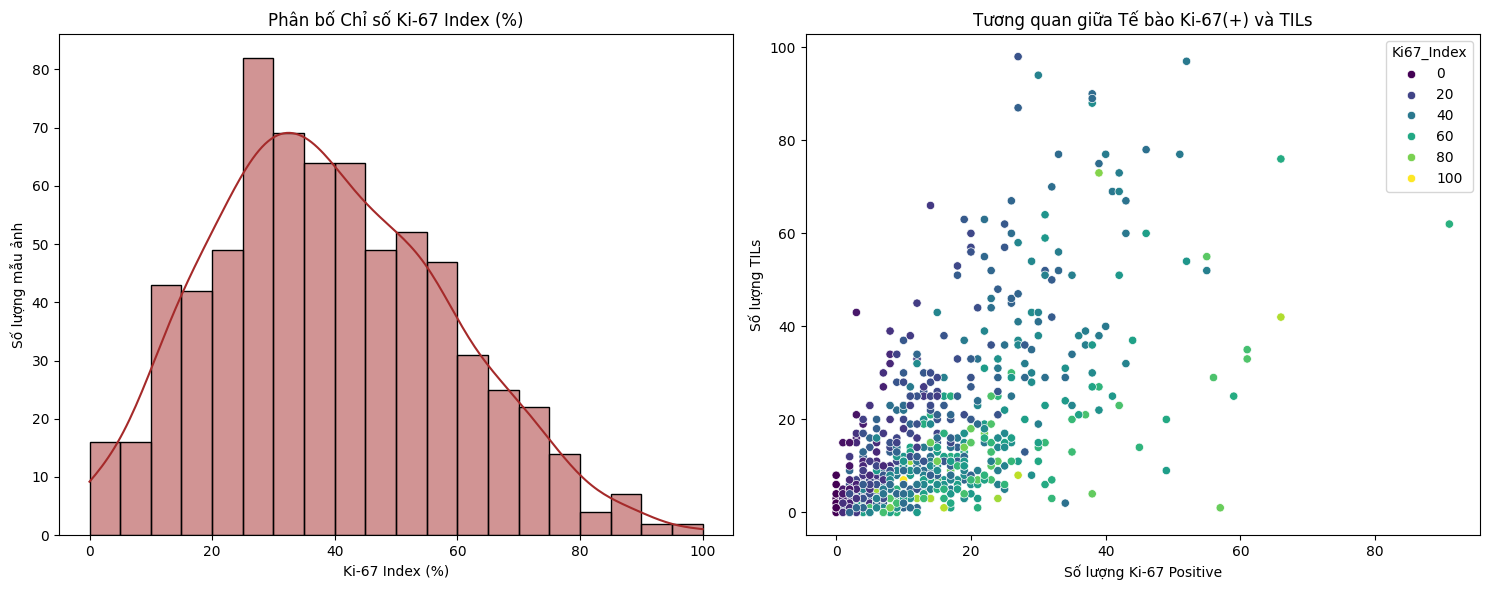

--- THỐNG KÊ TỔNG QUÁT (700 mẫu) ---
Ki-67 Index trung bình: 38.98%
Ảnh có Ki-67 cao nhất: 100.00%
Tổng số tế bào đã đếm được: 38,505


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tính toán Ki-67 Index (%) cho từng ảnh
# Tránh chia cho 0 nếu ảnh không có tế bào ung thư
df['Ki67_Index'] = (df['Ki67_Positive'] / (df['Ki67_Positive'] + df['Ki67_Negative'])) * 100
df['Ki67_Index'] = df['Ki67_Index'].fillna(0) # Thay thế NaN bằng 0

# 2. Thiết lập giao diện biểu đồ
plt.figure(figsize=(15, 6))

# Biểu đồ 1: Phân bố Chỉ số Ki-67
plt.subplot(1, 2, 1)
sns.histplot(df['Ki67_Index'], bins=20, kde=True, color='brown')
plt.title('Phân bố Chỉ số Ki-67 Index (%)')
plt.xlabel('Ki-67 Index (%)')
plt.ylabel('Số lượng mẫu ảnh')

# Biểu đồ 2: Tương quan giữa Ki-67(+) và TILs
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Ki67_Positive', y='TILs', hue='Ki67_Index', palette='viridis')
plt.title('Tương quan giữa Tế bào Ki-67(+) và TILs')
plt.xlabel('Số lượng Ki-67 Positive')
plt.ylabel('Số lượng TILs')

plt.tight_layout()
plt.show()

# In ra các chỉ số thống kê cơ bản
print(f"--- THỐNG KÊ TỔNG QUÁT (700 mẫu) ---")
print(f"Ki-67 Index trung bình: {df['Ki67_Index'].mean():.2f}%")
print(f"Ảnh có Ki-67 cao nhất: {df['Ki67_Index'].max():.2f}%")
print(f"Tổng số tế bào đã đếm được: {df['Total_Cells'].sum():,.0f}")

--- Đang vẽ kết quả cho 5 mẫu tiêu biểu nhất ---


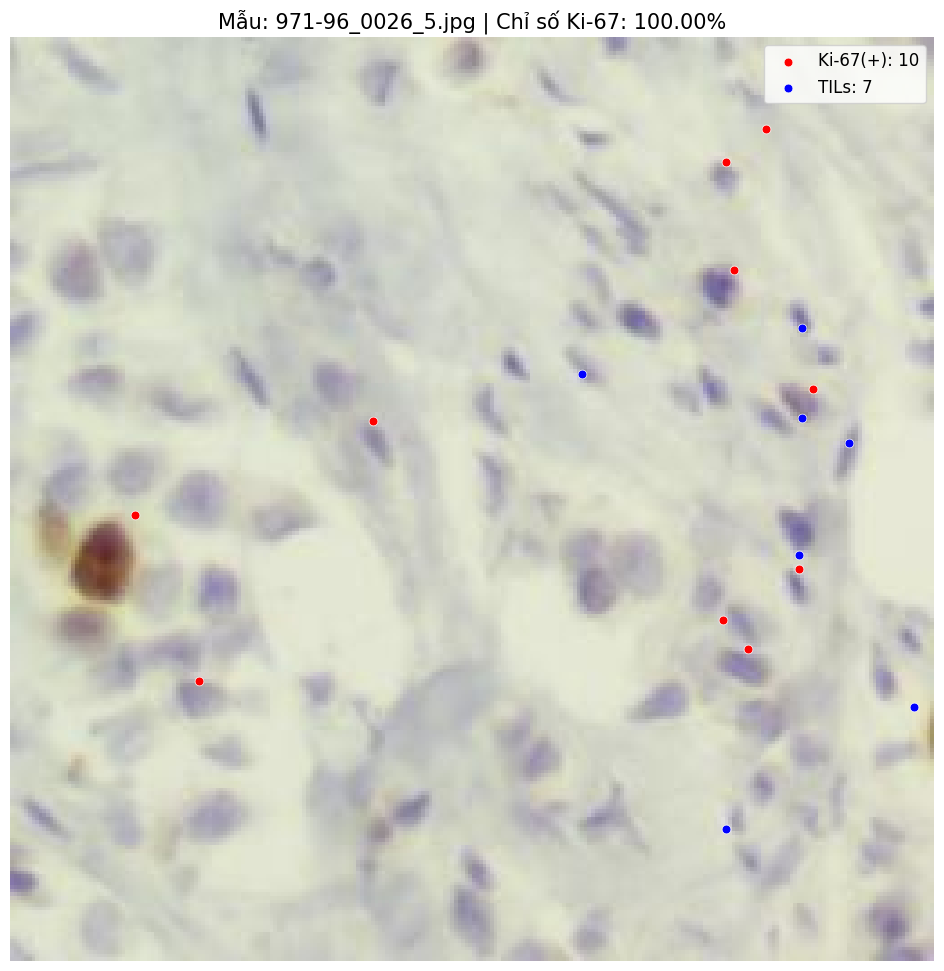

✓ Đã lưu kết quả phân tích: /content/drive/MyDrive/PathoNet_Top_Samples/Analysis_971-96_0026_5.jpg


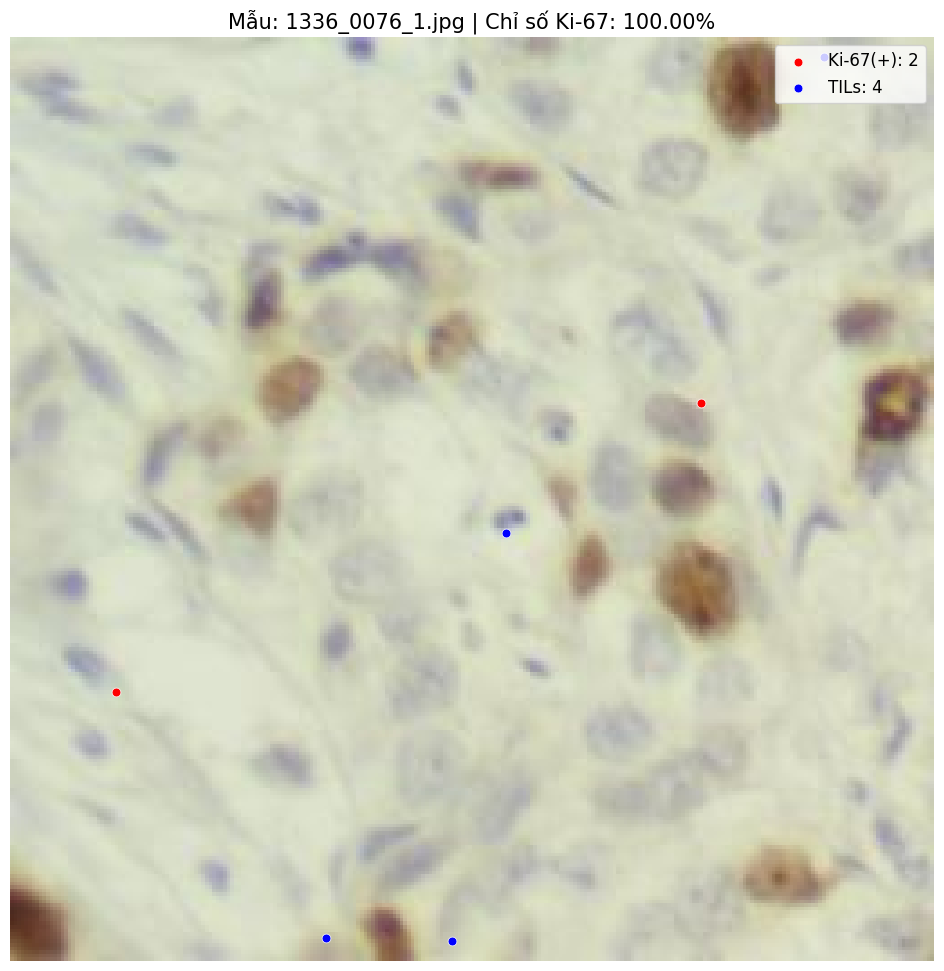

✓ Đã lưu kết quả phân tích: /content/drive/MyDrive/PathoNet_Top_Samples/Analysis_1336_0076_1.jpg


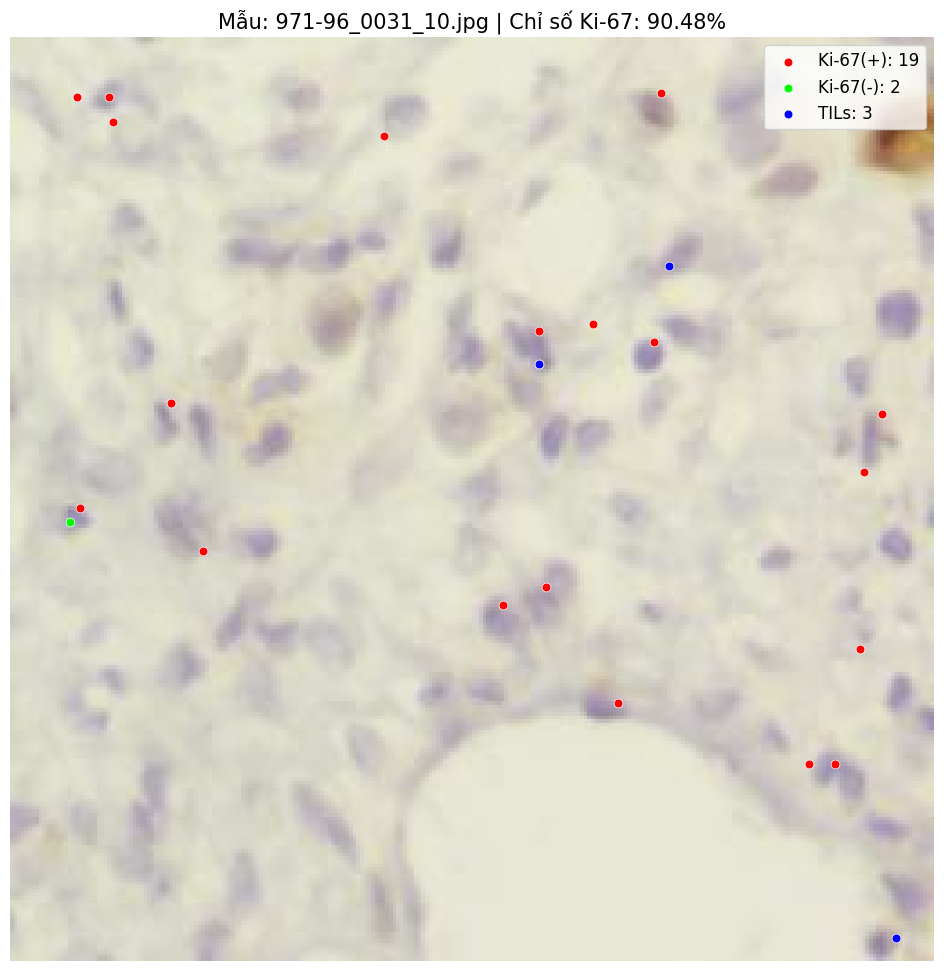

✓ Đã lưu kết quả phân tích: /content/drive/MyDrive/PathoNet_Top_Samples/Analysis_971-96_0031_10.jpg


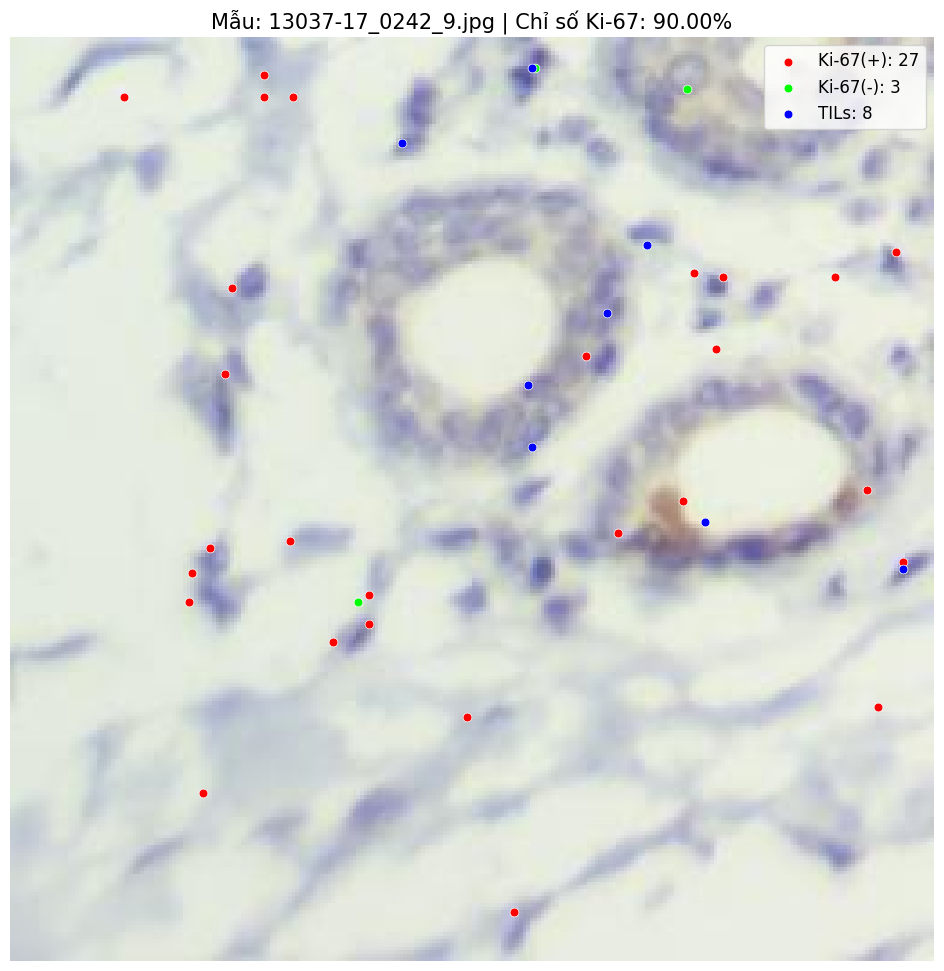

✓ Đã lưu kết quả phân tích: /content/drive/MyDrive/PathoNet_Top_Samples/Analysis_13037-17_0242_9.jpg


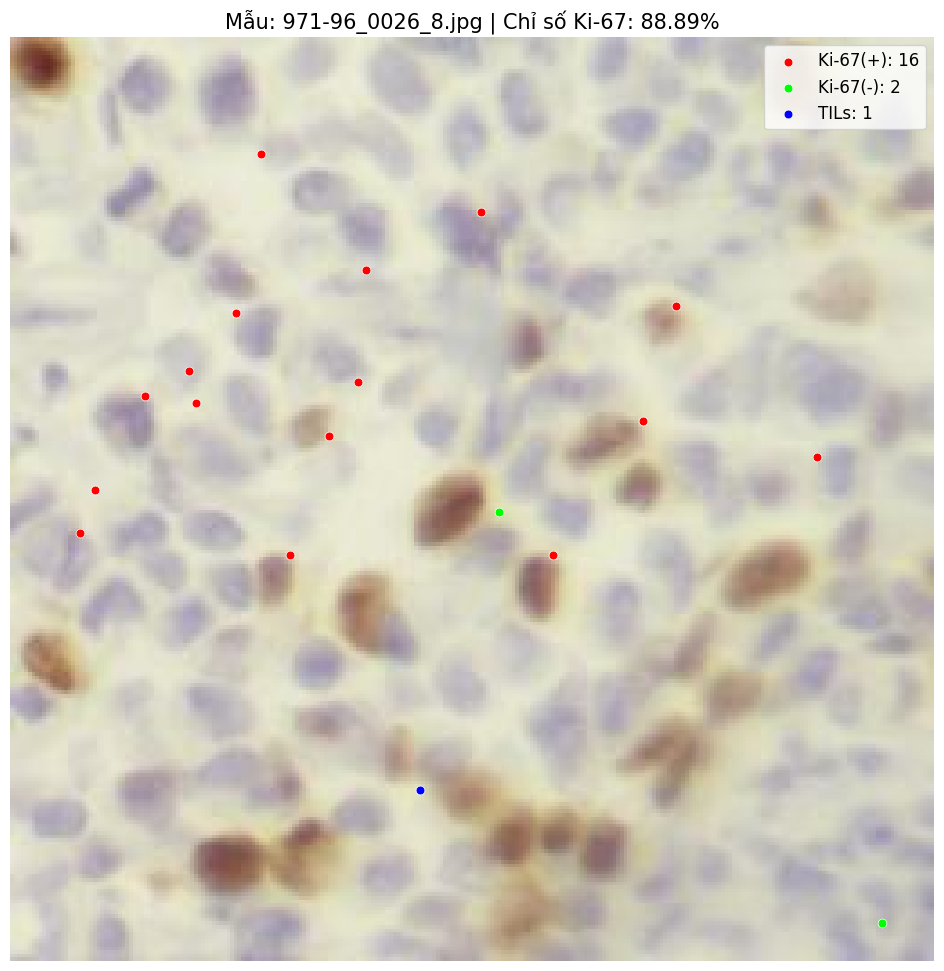

✓ Đã lưu kết quả phân tích: /content/drive/MyDrive/PathoNet_Top_Samples/Analysis_971-96_0026_8.jpg

🎉 HOÀN THÀNH: Bạn có thể vào Google Drive thư mục 'PathoNet_Top_Samples' để lấy ảnh báo cáo.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio.v2 as imageio
from skimage.feature import peak_local_max

# 1. Tạo thư mục lưu ảnh minh họa trên Drive
save_dir = "/content/drive/MyDrive/PathoNet_Top_Samples"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 2. Lấy danh sách 5 ảnh có Ki-67 Index cao nhất từ kết quả trước đó
top_5_df = df.sort_values(by='Ki67_Index', ascending=False).head(5)

print(f"--- Đang vẽ kết quả cho 5 mẫu tiêu biểu nhất ---")

for idx, row in top_5_df.iterrows():
    filename = row['Image_Name']
    img_path = os.path.join(input_path, filename)

    # Đọc ảnh gốc
    img = imageio.imread(img_path)

    # Tiền xử lý và dự đoán Heatmap
    img_input = np.expand_dims(img, axis=0) / 255.0
    preds = model.predict(img_input, verbose=0)[0]

    # Khởi tạo bản vẽ
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

    # Cấu hình màu sắc và nhãn
    colors = ['red', 'lime', 'blue']
    labels = ['Ki-67(+)', 'Ki-67(-)', 'TILs']

    for i in range(3):
        heatmap = preds[:, :, i]
        # Tìm tọa độ tâm tế bào (đã fix lỗi indices)
        coords = peak_local_max(heatmap, min_distance=5, threshold_abs=0.1)

        if len(coords) > 0:
            plt.scatter(coords[:, 1], coords[:, 0], c=colors[i], s=40,
                        edgecolors='white', linewidth=0.5, label=f"{labels[i]}: {len(coords)}")

    plt.title(f"Mẫu: {filename} | Chỉ số Ki-67: {row['Ki67_Index']:.2f}%", fontsize=15)
    plt.legend(loc='upper right', fontsize=12)
    plt.axis('off')

    # Lưu ảnh vào Google Drive
    save_path = os.path.join(save_dir, f"Analysis_{filename}")
    plt.savefig(save_path, bbox_inches='tight', dpi=150)
    plt.show()
    print(f"✓ Đã lưu kết quả phân tích: {save_path}")

print(f"\n🎉 HOÀN THÀNH: Bạn có thể vào Google Drive thư mục 'PathoNet_Top_Samples' để lấy ảnh báo cáo.")